## Recurrent Neural Networks
In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs. You can think of the additional inputs as being concatenated to the end of the “normal” inputs to the previous layer. For example, if a hidden layer had 10 regular input nodes and 128 hidden nodes in the layer, then it would actually have 138 total inputs (assuming you are feeding the layer’s outputs into itself à la Elman) rather than into another layer). Of course, the very first time you try to compute the output of the network you’ll need to fill in those extra 128 inputs with 0s or something.

Source: [Quora](https://www.quora.com/What-is-a-simple-explanation-of-a-recurrent-neural-network)
<img src="https://cdn-images-1.medium.com/max/1600/1*NKhwsOYNUT5xU7Pyf6Znhg.png">

Source: [Medium](https://medium.com/ai-journal/lstm-gru-recurrent-neural-networks-81fe2bcdf1f9)

Let me give you the best explanation of Recurrent Neural Networks that I found on internet: https://www.youtube.com/watch?v=UNmqTiOnRfg&t=3s

Now, even though RNNs are quite powerful, they suffer from  **Vanishing gradient problem ** which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: **Long Short Term Networks(LSTM).**

### What is Vanishing Gradient problem?
Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)

<img src="https://cdn-images-1.medium.com/max/1460/1*FWy4STsp8k0M5Yd8LifG_Q.png">

Source: [Medium](https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257)

## Long Short Term Memory(LSTM)
Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

<img src="https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.">

Source: [Medium](https://codeburst.io/generating-text-using-an-lstm-network-no-libraries-2dff88a3968)

The best LSTM explanation on internet: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235

Refer above link for deeper insights.

## Components of LSTMs
So the LSTM cell contains the following components
* Forget Gate “f” ( a neural network with sigmoid)
* Candidate layer “C"(a NN with Tanh)
* Input Gate “I” ( a NN with sigmoid )
* Output Gate “O”( a NN with sigmoid)
* Hidden state “H” ( a vector )
* Memory state “C” ( a vector)

* Inputs to the LSTM cell at any step are X<sub>t</sub> (current input) , H<sub>t-1</sub> (previous hidden state ) and C<sub>t-1</sub> (previous memory state).  
* Outputs from the LSTM cell are H<sub>t</sub> (current hidden state ) and C<sub>t</sub> (current memory state)

## Working of gates in LSTMs
First, LSTM cell takes the previous memory state C<sub>t-1</sub> and does element wise multiplication with forget gate (f) to decide if  present memory state C<sub>t</sub>. If forget gate value is 0 then previous memory state is completely forgotten else f forget gate value is 1 then previous memory state is completely passed to the cell ( Remember f gate gives values between 0 and 1 ).

**C<sub>t</sub> = C<sub>t-1</sub> * f<sub>t</sub>**

Calculating the new memory state: 

**C<sub>t</sub> = C<sub>t</sub> + (I<sub>t</sub> * C\`<sub>t</sub>)**

Now, we calculate the output:

**H<sub>t</sub> = tanh(C<sub>t</sub>)**

LSTM is not the only kind of unit that has taken the world of Deep Learning by a storm. We have **Gated Recurrent Units(GRU)**. It's not known, which is better: GRU or LSTM becuase they have comparable performances. GRUs are easier to train than LSTMs.

## Gated Recurrent Units
In simple words, the GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. Reset gate determines how to combine new input to previous memory and update gate determines how much of the previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. We don't have the second non linearity in GRU before calculating the outpu, .neither they have the output gate.

Source: [Quora](https://www.quora.com/Whats-the-difference-between-LSTM-and-GRU-Why-are-GRU-efficient-to-train)

<!-- <img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/11/GRU.png?x31195"> -->


<div class="alert alert-warning"> 1. Libraries and settings
<div/>

In [97]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.models import Sequential


<div class="alert alert-warning"> 2. Analyze Data
<div/>

In [98]:
# import all stock prices 
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


In [99]:
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [100]:
# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])


number of different stocks:  501
['LB', 'NLSN', 'UNH', 'SLG', 'BXP', 'FLIR', 'DAL', 'IVZ', 'ARNC', 'PWR']


In [101]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [102]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


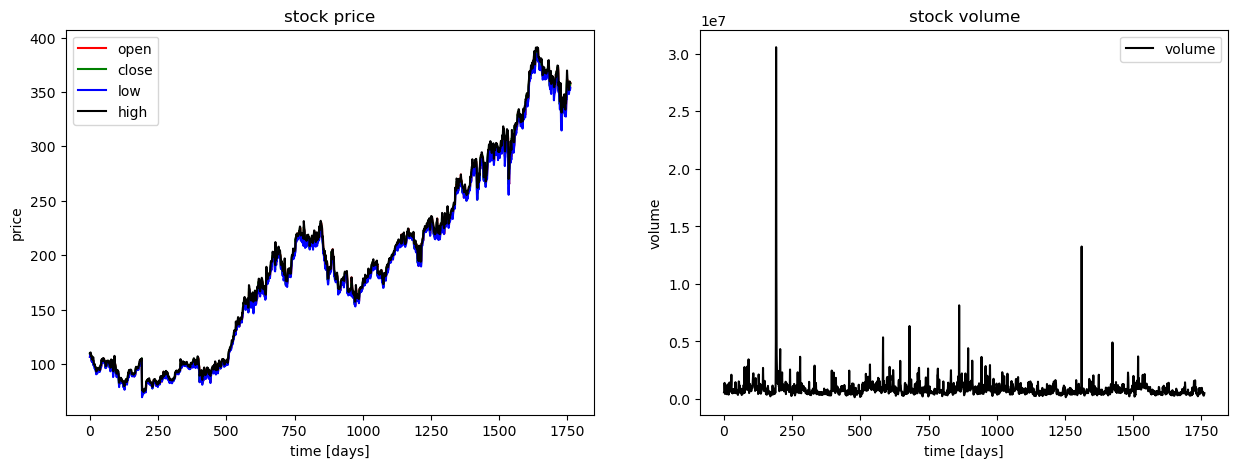

In [103]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(df[df.symbol == 'EQIX'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'EQIX'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'EQIX'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'EQIX'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2)
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best')


<div class="alert alert-warning"> 3. Manipulate Data
<div/>

- choose a specific stock

In [104]:
df_stock = df[df.symbol == 'EQIX'].copy()

- drop features: volume and symbol

In [105]:
df_stock.drop(['volume'], axis=1, inplace=True) 
df_stock.drop(['symbol'], axis=1, inplace=True)

In [106]:
cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

df_stock.columns.values =  ['open', 'close', 'low', 'high']


- normalize stock data

In [107]:
def normalize_data(df):
    min_max_scaler = MinMaxScaler()
    columns_to_scale = ['open', 'high', 'low', 'close']
    
    df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])
    return df

df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

- create train, validation and test data sets

In [108]:
def load_data(stock, seq_len, valid_set_size_percentage=10, test_set_size_percentage=10):
    data_raw = stock.to_numpy()  
    data = []

    # Create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index + seq_len])

    data = np.array(data)
    
    valid_set_size = int(np.round(valid_set_size_percentage / 100 * data.shape[0]))
    test_set_size = int(np.round(test_set_size_percentage / 100 * data.shape[0]))
    train_set_size = data.shape[0] - (valid_set_size + test_set_size)

    x_train, y_train = data[:train_set_size, :-1, :], data[:train_set_size, -1, :]
    x_valid, y_valid = data[train_set_size:train_set_size + valid_set_size, :-1, :], data[train_set_size:train_set_size + valid_set_size, -1, :]
    x_test, y_test = data[train_set_size + valid_set_size:, :-1, :], data[train_set_size + valid_set_size:, -1, :]

    return x_train, y_train, x_valid, y_valid, x_test, y_test

seq_len = 20 
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


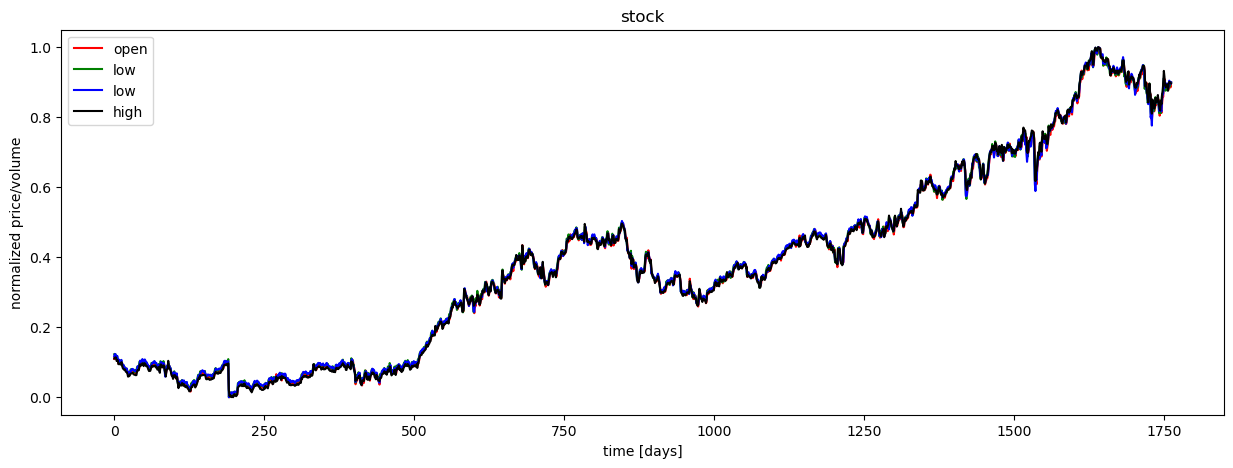

In [109]:
plt.figure(figsize=(15, 5))
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()


<div class="alert alert-warning"> 4. Model training
<div/>

In [110]:
def create_rnn_model(cell_type="BasicRNN", n_neurons=200, n_layers=2, learning_rate=0.001):
    model = tf.keras.Sequential()
    
    for i in range(n_layers):
        if cell_type == "LSTM":
            model.add(LSTM(n_neurons, return_sequences=(i < n_layers-1)))
        elif cell_type == "GRU":
            model.add(GRU(n_neurons, return_sequences=(i < n_layers-1)))
        else:
            model.add(SimpleRNN(n_neurons, return_sequences=(i < n_layers-1)))
    
    model.add(Dense(4))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model



# Train and evaluate function
def train_and_evaluate(model, x_train, y_train, x_valid, y_valid, x_test, y_test, epochs=100, batch_size=50):
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid, y_valid), verbose=0)
    training_time = time.time() - start_time
    
    y_train_pred = model.predict(x_train)
    y_valid_pred = model.predict(x_valid)
    y_test_pred = model.predict(x_test)
    
    return {
        "train_rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "valid_rmse": np.sqrt(mean_squared_error(y_valid, y_valid_pred)),
        "test_rmse": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "train_mae": mean_absolute_error(y_train, y_train_pred),
        "valid_mae": mean_absolute_error(y_valid, y_valid_pred),
        "test_mae": mean_absolute_error(y_test, y_test_pred),
        "training_time": training_time,
        "y_train_pred": y_train_pred,
        "y_valid_pred": y_valid_pred,
        "y_test_pred": y_test_pred,
        "history": history
    }

# Create models
models = {
    "BasicRNN": create_rnn_model("BasicRNN"),
    "LSTM": create_rnn_model("LSTM"),
    "GRU": create_rnn_model("GRU")
}


In [111]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    results[model_name] = train_and_evaluate(model, x_train, y_train, x_valid, y_valid, x_test, y_test)

Training BasicRNN...
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Training LSTM...
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training GRU...
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [112]:
print("Available keys in results:", results.keys())

Available keys in results: dict_keys(['BasicRNN', 'LSTM', 'GRU'])


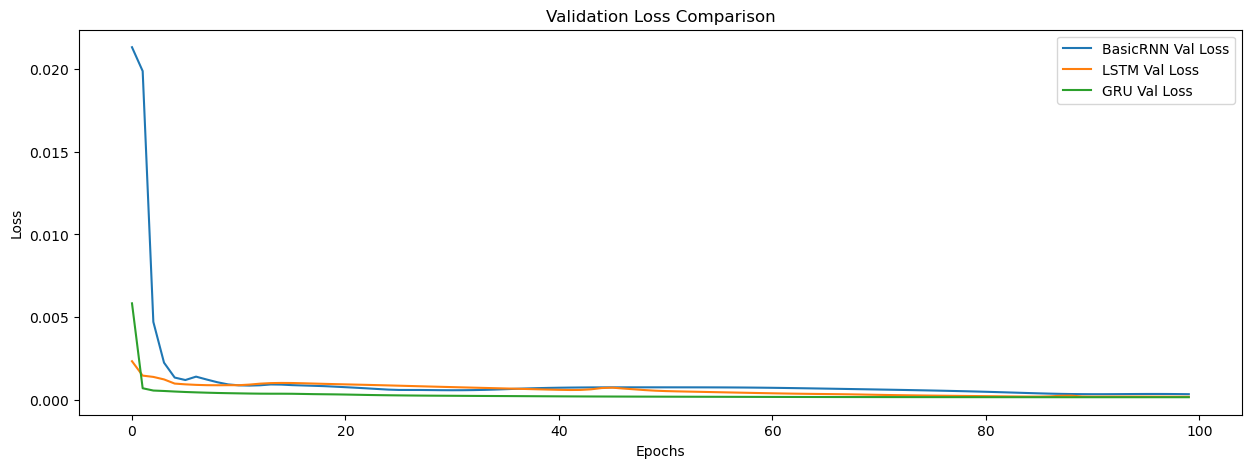

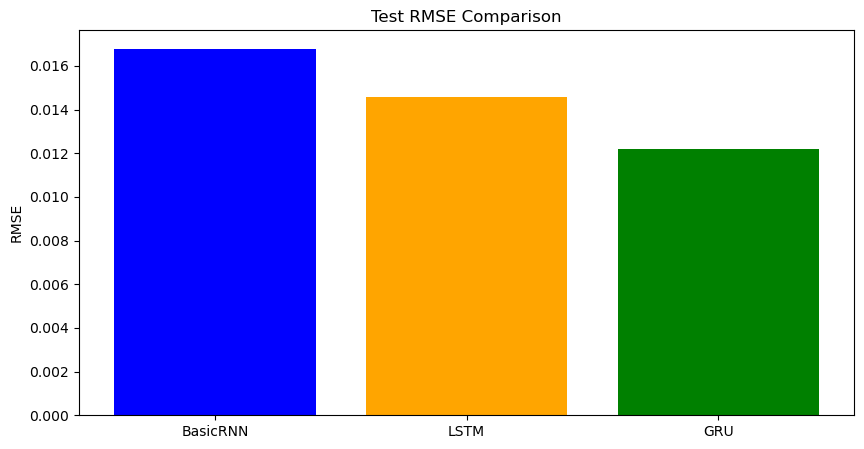

BasicRNN - RMSE: 0.0168, MAE: 0.0135, Training Time: 39.56s
LSTM - RMSE: 0.0146, MAE: 0.0117, Training Time: 88.20s
GRU - RMSE: 0.0122, MAE: 0.0092, Training Time: 78.66s


In [113]:
# Visualization
plt.figure(figsize=(15, 5))
for model_name, result in results.items():
    plt.plot(result['history'].history['val_loss'], label=f'{model_name} Val Loss')
plt.legend()
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Bar chart for RMSE
labels = list(results.keys())
rmse_values = [results[m]['test_rmse'] for m in labels]
plt.figure(figsize=(10,5))
plt.bar(labels, rmse_values, color=['blue', 'orange', 'green'])
plt.title("Test RMSE Comparison")
plt.ylabel("RMSE")
plt.show()

# Print results
for model_name, result in results.items():
    print(f"{model_name} - RMSE: {result['test_rmse']:.4f}, MAE: {result['test_mae']:.4f}, Training Time: {result['training_time']:.2f}s")


<div class="alert alert-warning"> 5. Predictions
<div/>

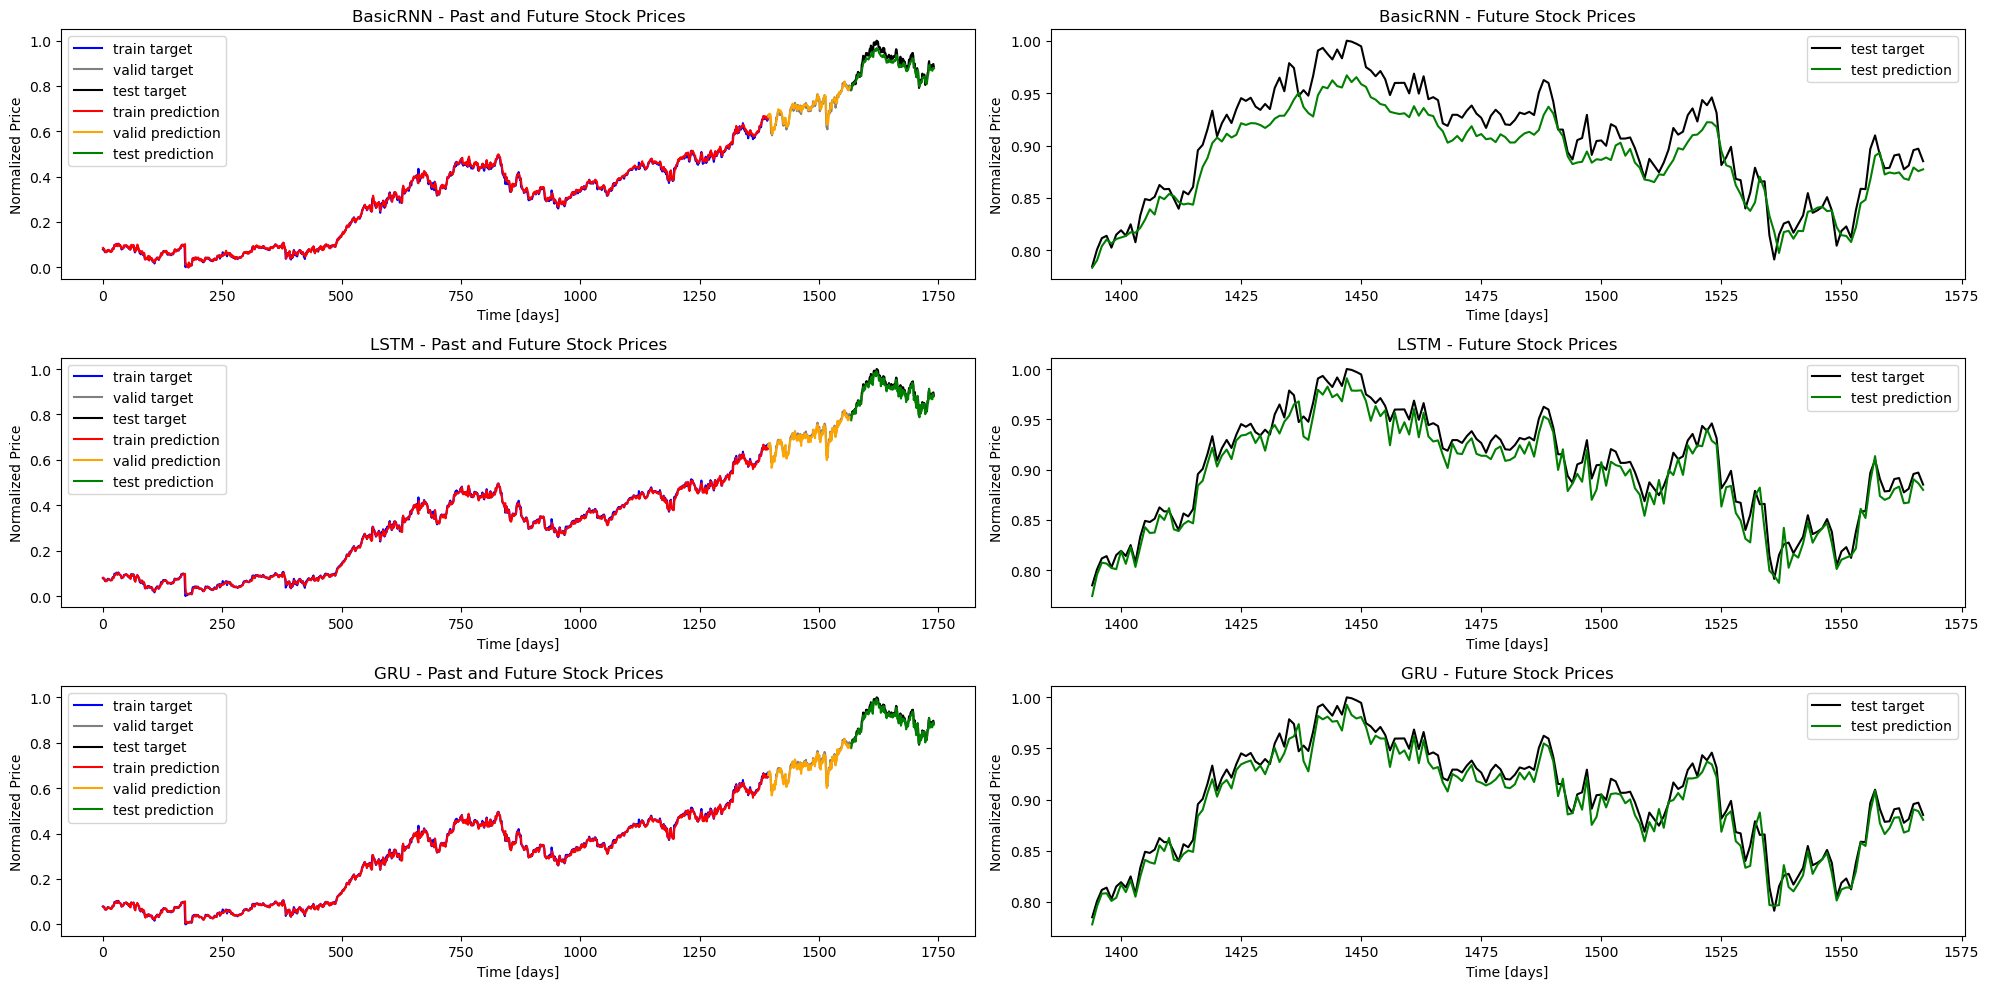

[BasicRNN] Correct sign prediction for close - open price for train/valid/test: 0.72/0.61/0.61
[LSTM] Correct sign prediction for close - open price for train/valid/test: 0.75/0.64/0.61
[GRU] Correct sign prediction for close - open price for train/valid/test: 0.75/0.64/0.61


In [114]:
models_list = [
    ("BasicRNN", results["BasicRNN"]),
    ("LSTM", results["LSTM"]),
    ("GRU", results["GRU"])
]

ft = 0  # 0 = open, 1 = close, 2 = highest, 3 = lowest

plt.figure(figsize=(20, 10))

for i, (model_name, result) in enumerate(models_list):
    y_train_pred = result["y_train_pred"]
    y_valid_pred = result["y_valid_pred"]
    y_test_pred = result["y_test_pred"]

    # Subplot 1: Entire dataset visualization
    plt.subplot(3, 2, 2 * i + 1)
    
    plt.plot(np.arange(y_train.shape[0]), y_train[:, ft], color='blue', label='train target')
    plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), 
             y_valid[:, ft], color='gray', label='valid target')
    plt.plot(np.arange(y_train.shape[0] + y_valid.shape[0], 
                       y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]), 
             y_test[:, ft], color='black', label='test target')

    plt.plot(np.arange(y_train_pred.shape[0]), y_train_pred[:, ft], color='red', label='train prediction')
    plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0] + y_valid_pred.shape[0]), 
             y_valid_pred[:, ft], color='orange', label='valid prediction')
    plt.plot(np.arange(y_train_pred.shape[0] + y_valid_pred.shape[0], 
                       y_train_pred.shape[0] + y_valid_pred.shape[0] + y_test_pred.shape[0]), 
             y_test_pred[:, ft], color='green', label='test prediction')

    plt.title(f'{model_name} - Past and Future Stock Prices')
    plt.xlabel('Time [days]')
    plt.ylabel('Normalized Price')
    plt.legend(loc='best')

    # Subplot 2: Future price focus
    plt.subplot(3, 2, 2 * i + 2)

    plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_test.shape[0]), 
             y_test[:, ft], color='black', label='test target')
    plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0] + y_test_pred.shape[0]), 
             y_test_pred[:, ft], color='green', label='test prediction')

    plt.title(f'{model_name} - Future Stock Prices')
    plt.xlabel('Time [days]')
    plt.ylabel('Normalized Price')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Correct Sign Prediction for Close - Open Price
for model_name, result in models_list:
    y_train_pred = result["y_train_pred"]
    y_valid_pred = result["y_valid_pred"]
    y_test_pred = result["y_test_pred"]

    corr_price_development_train = np.mean(np.equal(np.sign(y_train[:, 1] - y_train[:, 0]), 
                                                    np.sign(y_train_pred[:, 1] - y_train_pred[:, 0])).astype(int))

    corr_price_development_valid = np.mean(np.equal(np.sign(y_valid[:, 1] - y_valid[:, 0]), 
                                                    np.sign(y_valid_pred[:, 1] - y_valid_pred[:, 0])).astype(int))

    corr_price_development_test = np.mean(np.equal(np.sign(y_test[:, 1] - y_test[:, 0]), 
                                                   np.sign(y_test_pred[:, 1] - y_test_pred[:, 0])).astype(int))

    print(f'[{model_name}] Correct sign prediction for close - open price for train/valid/test: '
          f'{corr_price_development_train:.2f}/{corr_price_development_valid:.2f}/{corr_price_development_test:.2f}')


In [115]:
from tabulate import tabulate

table_data = []
for name, model_results in models_list:
    table_data.append([
        name,
        f"{model_results['train_rmse']:.4f}",
        f"{model_results['valid_rmse']:.4f}",
        f"{model_results['test_rmse']:.4f}",
        f"{model_results['train_mae']:.4f}",
        f"{model_results['valid_mae']:.4f}",
        f"{model_results['test_mae']:.4f}",
        f"{model_results['training_time']:.2f} s"
    ])

headers = ["Model", "Train RMSE", "Valid RMSE", "Test RMSE", "Train MAE", "Valid MAE", "Test MAE", "Time (s)"]

print("Model Performance Comparison:\n")
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))


Model Performance Comparison:

╒══════════╤══════════════╤══════════════╤═════════════╤═════════════╤═════════════╤════════════╤════════════╕
│ Model    │   Train RMSE │   Valid RMSE │   Test RMSE │   Train MAE │   Valid MAE │   Test MAE │ Time (s)   │
╞══════════╪══════════════╪══════════════╪═════════════╪═════════════╪═════════════╪════════════╪════════════╡
│ BasicRNN │       0.0122 │       0.0187 │      0.0168 │      0.0089 │      0.0133 │     0.0135 │ 39.56 s    │
├──────────┼──────────────┼──────────────┼─────────────┼─────────────┼─────────────┼────────────┼────────────┤
│ LSTM     │       0.0083 │       0.0139 │      0.0146 │      0.0056 │      0.0104 │     0.0117 │ 88.20 s    │
├──────────┼──────────────┼──────────────┼─────────────┼─────────────┼─────────────┼────────────┼────────────┤
│ GRU      │       0.0079 │       0.0129 │      0.0122 │      0.0052 │      0.0092 │     0.0092 │ 78.66 s    │
╘══════════╧══════════════╧══════════════╧═════════════╧═════════════╧═══════════

### Observations & Insights
1. GRU performs best overall 🚀

- Lowest RMSE and MAE on all datasets (Train, Validation, and Test).
- Outperforms LSTM and BasicRNN, meaning it generalizes better.
2. LSTM is also strong but slightly worse than GRU

- Performs better than BasicRNN but has higher error than GRU on all datasets.
- Takes the longest time (88.2s), making it computationally expensive.
3. BasicRNN is the weakest

- Highest RMSE and MAE, meaning less accurate predictions.
- Fastest training time (39.56s), but this comes at the cost of lower accuracy.
